In [1]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram


In [2]:
# Longitud de la cadena secreta (n)
n = 4


In [3]:
# Crear un circuito cuántico con n+1 qubits (el último qubit se utiliza para medir)
bv_circuit = QuantumCircuit(n+1, n)



In [4]:
# Aplicar una puerta Hadamard a todos los qubits, excepto el último
for qubit in range(n):
    bv_circuit.h(qubit)



In [5]:
# Oráculo: Representación de la cadena secreta 's' (en este ejemplo, s = '1010')
s = '1010'
for qubit in range(n):
    if s[qubit] == '1':
        bv_circuit.cx(qubit, n)  # Aplicar una puerta CNOT al último qubit controlado por qubit



In [6]:
# Aplicar una puerta Hadamard a todos los qubits, excepto el último
for qubit in range(n):
    bv_circuit.h(qubit)



In [7]:
# Medir los primeros n qubits
bv_circuit.measure(range(n), range(n))




In [8]:

# Ejecutar el circuito en un simulador
simulator = Aer.get_backend('qasm_simulator')
job = execute(bv_circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()

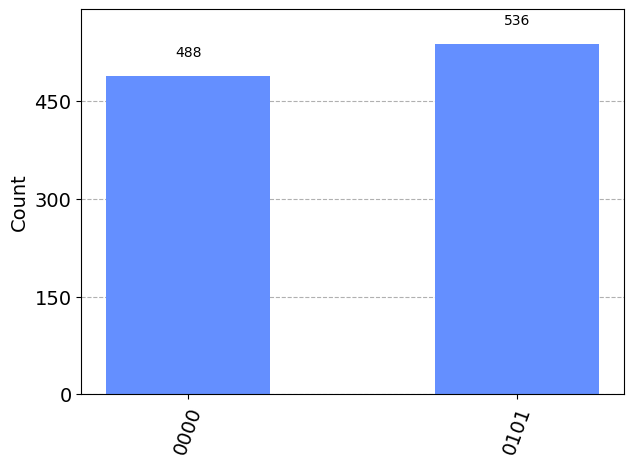

In [15]:
# Mostrar el resultado
plot_histogram(counts)